In [9]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy.linalg as npl
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.mixture import GaussianMixture

In [11]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "project 1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
X = np.load('p1/X.npy')
y = np.load('p1/y.npy')

In [3]:
y.shape

(511,)

In [4]:
X.shape

(511, 45768)

In [14]:
x_pd = pd.DataFrame(X)

In [16]:
x_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.000000,511.000000,...,511.0,511.000000,511.0,511.0,511.0,511.0,511.0,511.0,511.0,511.0
mean,0.054672,0.058250,90.353914,88.537287,0.452837,7.951541,6.433697,0.0,79.970117,52.317877,...,0.0,0.005030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.626603,0.933128,75.322807,99.396369,1.764018,18.480603,16.583797,0.0,100.438791,47.862698,...,0.0,0.113697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,46.519974,30.533496,0.000000,0.000000,0.000000,0.0,20.874684,23.913273,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,78.631988,70.721072,0.000000,0.000000,1.508132,0.0,60.448151,43.418288,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,117.655529,115.518626,0.000000,11.297401,5.907717,0.0,111.790365,67.034210,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11.941398,16.066405,817.737136,959.055180,18.063125,209.208108,223.440719,0.0,1172.775364,442.544844,...,0.0,2.570152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
x_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Columns: 45768 entries, 0 to 45767
dtypes: float64(45768)
memory usage: 178.4 MB


In [5]:
X_log2 = np.log2(X+1)

In [45]:
x_log_pd = pd.DataFrame(X_log2)

In [46]:
x_log_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.000000,511.000000,...,511.0,511.000000,511.0,511.0,511.0,511.0,511.0,511.0,511.0,511.0
mean,0.028161,0.015598,5.830424,5.421903,0.239291,1.590487,1.664785,0.0,5.104388,5.055406,...,0.0,0.003593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.254691,0.249177,1.940109,2.352030,0.696383,2.022056,1.701018,0.0,2.508239,1.786475,...,0.0,0.081219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,5.570451,4.978767,0.000000,0.000000,0.000000,0.0,4.451187,4.638842,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,6.315276,6.164325,0.000000,0.000000,1.326613,0.0,5.941298,5.473082,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,6.890635,6.864415,0.000000,3.620281,2.788197,0.0,6.817500,6.088188,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.693922,4.093087,9.677257,9.906974,4.252713,7.715675,7.810191,0.0,10.196941,8.792936,...,0.0,1.835986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
np.log2(11.941398+1)

3.6939215683789626

Saving figure Elbow_plot_with_log_values


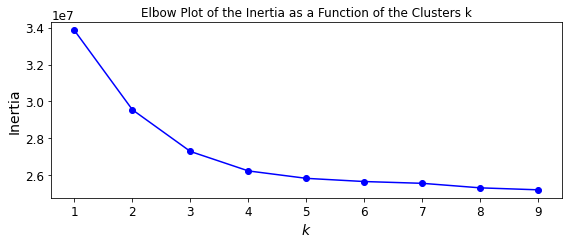

In [17]:
# Aplying K-means with elbow method to choose amount of clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_log2)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Plot of the Inertia as a Function of the Clusters k")
save_fig("Elbow_plot_with_log_values")
plt.show()

In [19]:
# Predicting clusters with K-means and 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_pred = kmeans.fit_predict(X_log2)
kmeans.inertia_

25826642.218571935

Saving figure silhouette_score_vs_k_plot


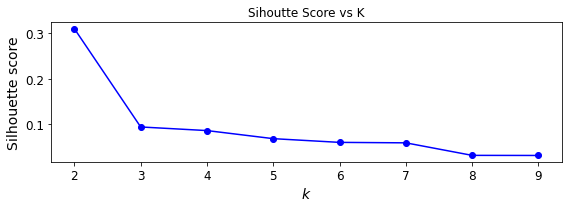

In [23]:
# Silhoutte score of kmeans
silhouette_score(X_log2, kmeans.labels_)
silhouette_scores = [silhouette_score(X_log2, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Sihoutte Score vs K")
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure silhouette_analysis_plot_with_log_values


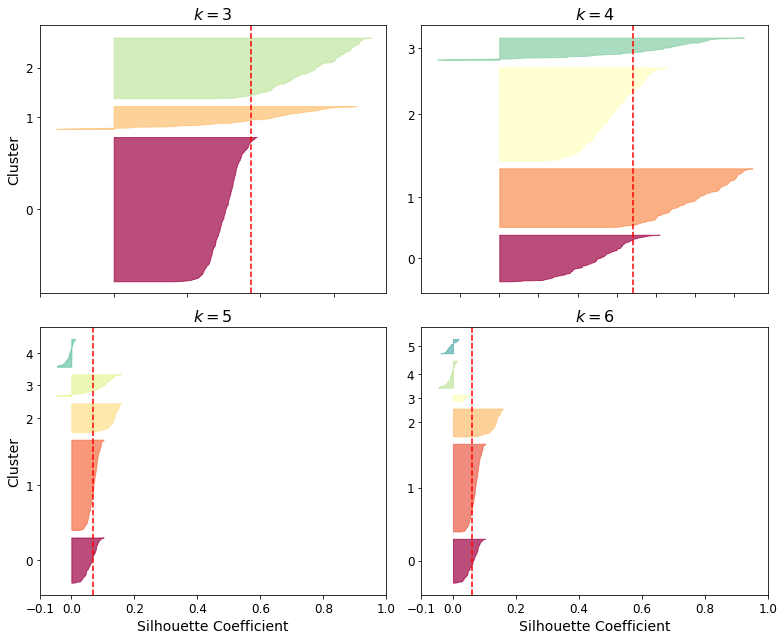

In [26]:
# Applying Silhoutte Diagram for various values of k

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_log2, y_pred)

    padding = len(X_log2) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot_with_log_values")
plt.show()

In [29]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [30]:
pca.components_.T[:,0]

array([-3.58170771e-06, -3.37698003e-06,  5.99940334e-04, ...,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [31]:
pca.explained_variance_ratio_

array([0.42779671, 0.14804008])

In [73]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_log2)

In [74]:
pca.components_.T[:,0]

array([-8.28784206e-05, -5.85028284e-05, -1.00745896e-02, ...,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [79]:
np.max(pca.components_[:,0])

0.0003322943882740095

In [80]:
np.max(pca.components_.T[:,0])

0.033358095941326

In [48]:
pca.explained_variance_ratio_

array([0.13887565, 0.06882332])

In [13]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 85) + 1

In [14]:
d

1

In [19]:
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X)
pca.components_.T[:,0]
len(pca.components_.T[:,0])
pca.explained_variance_ratio_

array([0.42779671, 0.14804008, 0.05785528, 0.04294885, 0.02411034,
       0.0167119 , 0.01409453, 0.01114905, 0.00960092, 0.00709494,
       0.00630011, 0.00590574, 0.00513572, 0.00492604, 0.00441136,
       0.00432671, 0.0038999 , 0.00371033, 0.00360068, 0.00354081,
       0.00342199, 0.00335464, 0.00317406, 0.00305033, 0.00297623,
       0.00293527, 0.00282606, 0.00279769, 0.00273712, 0.00269319,
       0.00264597, 0.00254302, 0.00248401, 0.00247497, 0.00242626,
       0.00239345])

In [22]:
len(pca.explained_variance_ratio_)

36

In [23]:
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X_log2)
pca.components_.T[:,0]
len(pca.components_.T[:,0])
pca.explained_variance_ratio_

array([0.13887565, 0.06882332, 0.03042886, 0.01353755, 0.01241041,
       0.0068265 , 0.00579699, 0.00485573, 0.00462978, 0.00405961,
       0.00350371, 0.00345371, 0.0032804 , 0.00326608, 0.00323887,
       0.00318921, 0.00316092, 0.00311762, 0.00309984, 0.00309466,
       0.00307812, 0.00306924, 0.00304944, 0.00304469, 0.00301652,
       0.00298546, 0.00297408, 0.00295759, 0.0029464 , 0.00292966,
       0.00290866, 0.00288597, 0.0028815 , 0.00286698, 0.00285238,
       0.00284981, 0.00283528, 0.00282552, 0.00280262, 0.00279568,
       0.00277751, 0.00276954, 0.00275887, 0.00274073, 0.00272451,
       0.00271323, 0.00269462, 0.00268815, 0.00268551, 0.00266237,
       0.00263724, 0.00262441, 0.0026104 , 0.00259549, 0.00259174,
       0.00258323, 0.00256464, 0.00255921, 0.00253942, 0.00251715,
       0.00250399, 0.00246212, 0.00243931, 0.00236837, 0.00233028,
       0.0023187 , 0.0022265 , 0.00221759, 0.0021892 , 0.00213424,
       0.00211455, 0.00208898, 0.0020642 , 0.00204224, 0.00203

In [24]:
len(pca.explained_variance_ratio_)

339

In [4]:
# Manually extracting PCAs from log transformed data
# X_centered = X_log2 - X_log2.mean(axis=0)
# U, s, Vt = np.linalg.svd(X_centered)
# c1_log = Vt_log.T[:0]
# c2_log = Vt.T[:,1]
# m, n = X_log2.shape

# S = np.zeros(X_centered.shape)
# S[:n, :n] = np.diag(s)

# Check whether X_centered matches U@S@Vt
# np.allclose(X_centered, U.dot(S).dot(Vt))

In [3]:
# Projecting the log transformed training data onto the plane defined by the first two principal components
# W2 = Vt.T[:, :2]
# X2D_using_svd = X_centered_log.dot(W2)


In [ ]:
# computing the explained variance ratio with s as the diagonal of the matrix s
# np.square(s) / np.square(s).sum()

In [ ]:
# Visualizing data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_log2, y)
plt.show()

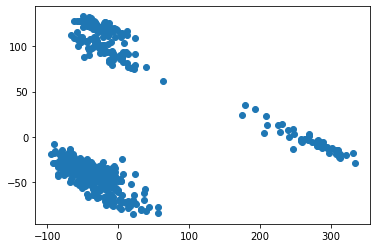

In [50]:
# Visualizing data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1])
plt.show()

In [51]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_log2)

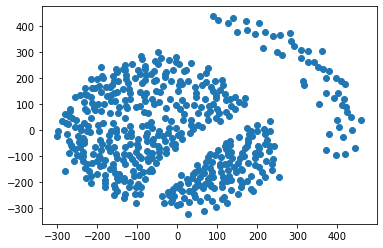

In [52]:
# Visualizing data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_reduced_mds[:,0], X_reduced_mds[:,1])
plt.show()

In [92]:
from sklearn.manifold import TSNE

pca = PCA(n_components = 50)
X2D_tsne = pca.fit_transform(X_log2)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(X2D_tsne)

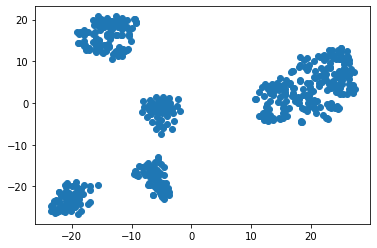

In [93]:
# Visualizing data
import matplotlib.pyplot as plt
X_tsne_sorted = np.sort(X_reduced_tsne)
fig, ax = plt.subplots()
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1])
plt.show()

In [86]:
pca = PCA(n_components = 50)
X_50PCA = pca.fit_transform(X_log2)

In [118]:
X_50PCA.shape

(511, 50)

In [89]:
len(pca.explained_variance_ratio_)

50

In [91]:
len(pca.components_)

50

In [126]:
# K-Means
k = 5
kmeans = KMeans(n_clusters=k)
kmeans_data = kmeans.fit(X_50PCA)

In [128]:
kmeans_data

KMeans(n_clusters=5)

In [130]:
kmeans.inertia_

5930976.688059369

In [2]:
#plt.scatter(X_50PCA[:,0], X_50PCA[:,1], c=kmeans_data, cmap=plt.cm.hot)

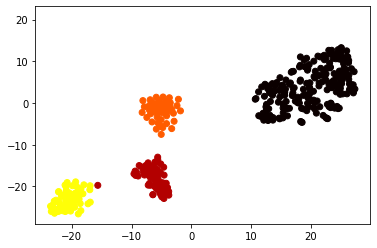

In [112]:
fig, ax = plt.subplots()
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y_pred,cmap=plt.cm.hot)
plt.show()

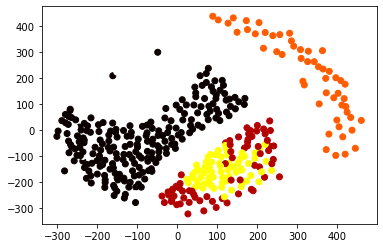

In [113]:
fig, ax = plt.subplots()
ax.scatter(X_reduced_mds[:,0], X_reduced_mds[:,1],c=y_pred,cmap=plt.cm.hot)
plt.show()

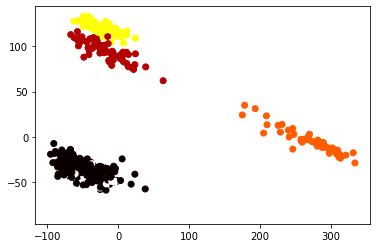

In [114]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=y_pred, cmap=plt.cm.hot)
plt.show()

In [116]:
len(kmeans.cluster_centers_)

5

In [117]:
kmeans.inertia_

5770329.0740197655

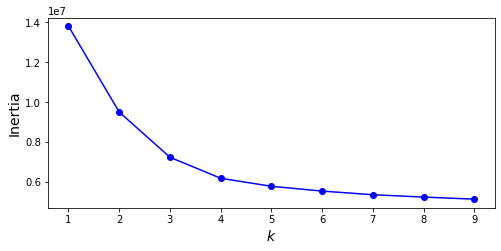

In [123]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_50PCA)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [124]:
kmeans.inertia_

5770329.0740197655